# Load package

In [1]:
# import packages
import os
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import colors
import matplotlib.pyplot as plt 
import numpy as np     
from sklearn.preprocessing import RobustScaler
import sklearn

features of cluster01

high value:

income 
employment
crime
hous_serv
edu

relatively high:
living_env

# Read data

In [2]:
cluster01 = pd.read_csv('clu1.csv')
cluster01.head()

,Unnamed: 0.1,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,...,london_imd_decile,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env,cluster_id
0,3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,...,3,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,1
1,5,E01000007,Barking and Dagenham 015A,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,1391,...,2,31.576,0.207,0.107,11.385,-0.027,0.846,50.420,25.995,1
2,6,E01000008,Barking and Dagenham 015B,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,1544,...,1,37.596,0.265,0.151,25.506,0.250,0.353,45.413,30.233,1
3,7,E01000009,Barking and Dagenham 016B,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1773,...,2,32.844,0.187,0.109,15.713,0.454,0.895,48.119,28.601,1
4,10,E01000012,Barking and Dagenham 015D,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,1901,...,2,34.714,0.239,0.096,19.774,-0.056,0.542,56.507,36.881,1


In [3]:
for col in cluster01.columns:
    print(col)

Unnamed: 0.1
LSOA11CD
LSOA11NM
MSOA11CD
MSOA11NM
LAD11CD
LAD11NM
RGN11CD
RGN11NM
USUALRES
HHOLDRES
COMESTRES
POPDEN
HHOLDS
AVHHOLDSZ
area
summary
m_price
minimum_ni
m_monrevie
m_hostlist
m_avaliabl
geometry
density
Unnamed: 0
code
name
london_imd_rank
london_imd_decile
imd
income
employment
edu_ski_tra
health_depri
crime
hous_serv
living_env
cluster_id


In [4]:
cluster01 = cluster01.drop(['Unnamed: 0.1','MSOA11CD','MSOA11NM','LAD11CD','LAD11NM','RGN11CD','RGN11NM','area',
                            'summary','code','name','london_imd_rank','london_imd_decile','cluster_id'], axis=1)
cluster01

,LSOA11CD,LSOA11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,m_price,minimum_ni,...,density,Unnamed: 0,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
0,E01000005,City of London 001E,985,985,0,52.0,467,2.1,138.478261,3.666667,...,0.000362,3,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979
1,E01000007,Barking and Dagenham 015A,1391,1391,0,69.6,612,2.3,62.000000,2.571429,...,0.000071,5,31.576,0.207,0.107,11.385,-0.027,0.846,50.420,25.995
2,E01000008,Barking and Dagenham 015B,1544,1544,0,79.1,521,3.0,170.000000,3.000000,...,0.000005,6,37.596,0.265,0.151,25.506,0.250,0.353,45.413,30.233
3,E01000009,Barking and Dagenham 016B,1773,1773,0,138.6,638,2.8,95.916667,4.250000,...,0.000093,7,32.844,0.187,0.109,15.713,0.454,0.895,48.119,28.601
4,E01000012,Barking and Dagenham 015D,1901,1895,6,136.8,698,2.7,25.600000,1.200000,...,0.000036,10,34.714,0.239,0.096,19.774,-0.056,0.542,56.507,36.881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,E01033703,Hackney 010F,1410,1395,15,215.6,625,2.2,66.268293,3.780488,...,0.000631,4801,34.171,0.224,0.119,10.958,0.482,0.938,44.436,31.492
1144,E01033705,Hackney 028D,1417,1417,0,88.5,576,2.5,73.000000,4.166667,...,0.000145,4803,31.723,0.199,0.123,21.417,0.430,0.258,46.256,23.466
1145,E01033726,Greenwich 034E,2493,2439,54,24.2,818,3.0,76.571429,2.190476,...,0.000020,4814,33.551,0.218,0.136,24.699,0.092,0.965,31.943,37.393
1146,E01033737,Greenwich 004I,1495,1495,0,63.3,602,2.5,73.903226,2.516129,...,0.000131,4825,33.761,0.231,0.154,16.960,0.601,0.885,33.030,19.154


summary

features of cluster01

high value:

income 

employment

crime

hous_serv

cluster01:

low airbnb price

low minimuns nights

high month review

low hostlisting number

relatively high availability

relatively high density

# correlation matrix

In [5]:
# what is the Pearson correlation between IMD and Airbnb?
corr = cluster01.corr()
corr.style.background_gradient(cmap='coolwarm')

,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,m_price,minimum_ni,m_monrevie,m_hostlist,m_avaliabl,density,Unnamed: 0,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
USUALRES,1.000000,0.985214,0.138710,0.083145,0.739760,0.162742,-0.019325,-0.022449,-0.005125,-0.019921,-0.048151,-0.001029,0.066009,-0.124812,-0.102445,-0.175921,-0.055182,-0.148021,-0.003054,0.052646,0.080310
HHOLDRES,0.985214,1.000000,-0.033011,0.085281,0.738617,0.183037,-0.034210,-0.023190,-0.004519,-0.022116,-0.038507,-0.019632,0.056995,-0.120705,-0.089082,-0.179463,-0.033855,-0.174602,0.000586,0.064024,0.071878
COMESTRES,0.138710,-0.033011,1.000000,-0.007915,0.045997,-0.108649,0.085016,0.003091,-0.003773,0.011628,-0.058305,0.107477,0.055620,-0.030384,-0.082693,0.011107,-0.126212,0.145769,-0.021201,-0.062971,0.053014
POPDEN,0.083145,0.085281,-0.007915,1.000000,0.097690,-0.021933,0.176102,0.079124,0.031134,0.281147,-0.213308,0.580105,0.258959,0.133196,0.326733,0.201530,-0.225913,0.176394,-0.114793,-0.238114,0.190748
HHOLDS,0.739760,0.738617,0.045997,0.097690,1.000000,-0.508613,0.133122,0.031193,-0.019382,0.081563,-0.112423,0.159444,0.035367,-0.003932,0.029115,0.043554,-0.251676,0.089392,0.090797,-0.144024,0.145163
AVHHOLDSZ,0.162742,0.183037,-0.108649,-0.021933,-0.508613,1.000000,-0.205853,-0.071747,0.023362,-0.139976,0.112535,-0.237521,0.011198,-0.162994,-0.177418,-0.310545,0.307377,-0.354175,-0.137048,0.295464,-0.105977
m_price,-0.019325,-0.034210,0.085016,0.176102,0.133122,-0.205853,1.000000,0.094947,0.021353,0.326699,-0.020577,0.357510,0.096073,0.089661,0.099566,0.146318,-0.200088,0.067390,0.112532,-0.179744,0.197344
minimum_ni,-0.022449,-0.023190,0.003091,0.079124,0.031193,-0.071747,0.094947,1.000000,-0.055038,0.087021,0.048011,0.064482,0.000888,0.045754,0.042404,0.047846,-0.087414,0.062627,0.008730,-0.013595,0.077977
m_monrevie,-0.005125,-0.004519,-0.003773,0.031134,-0.019382,0.023362,0.021353,-0.055038,1.000000,0.027723,0.033832,0.104835,0.030179,-0.022857,-0.020112,-0.047422,0.015926,-0.025605,0.030646,-0.045229,0.058423
m_hostlist,-0.019921,-0.022116,0.011628,0.281147,0.081563,-0.139976,0.326699,0.087021,0.027723,1.000000,-0.044003,0.356118,0.100620,0.086756,0.163497,0.177667,-0.165328,0.098132,0.086020,-0.247799,0.111251


summary

moderate positive correlationship:

    airbnb density - population density & m_hostlist & living_env

    average housinghold - edu_ski_tra & hous_serv 


moderate negative correlationship:

    airbnb density - edu_ski_tra & hous_serv & average housinghold

    average housinghold - employment

# regression analysis

In [6]:
cluster01.head()

,LSOA11CD,LSOA11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,m_price,minimum_ni,...,density,Unnamed: 0,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
0,E01000005,City of London 001E,985,985,0,52.0,467,2.1,138.478261,3.666667,...,0.000362,3,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979
1,E01000007,Barking and Dagenham 015A,1391,1391,0,69.6,612,2.3,62.000000,2.571429,...,0.000071,5,31.576,0.207,0.107,11.385,-0.027,0.846,50.420,25.995
2,E01000008,Barking and Dagenham 015B,1544,1544,0,79.1,521,3.0,170.000000,3.000000,...,0.000005,6,37.596,0.265,0.151,25.506,0.250,0.353,45.413,30.233
3,E01000009,Barking and Dagenham 016B,1773,1773,0,138.6,638,2.8,95.916667,4.250000,...,0.000093,7,32.844,0.187,0.109,15.713,0.454,0.895,48.119,28.601
4,E01000012,Barking and Dagenham 015D,1901,1895,6,136.8,698,2.7,25.600000,1.200000,...,0.000036,10,34.714,0.239,0.096,19.774,-0.056,0.542,56.507,36.881


## check Y: density

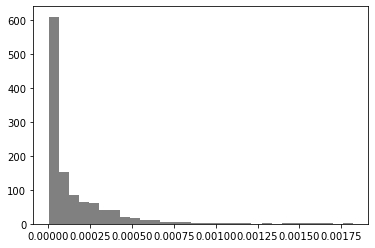

In [7]:
# density histogram
x0 = cluster01.density
bins = 30
plt.hist(x0 , bins, color = 'grey')
plt.show()

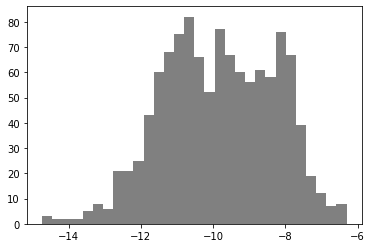

In [8]:
# log transformation
logD = np.log(cluster01['density'])
cluster01['logD']=logD
# log density histogram
x0 = cluster01.logD
bins = 30
plt.hist(x0 , bins, color = 'grey')
plt.show()

A. airbnb density - living_env

B. airbnb density - hous_serv

C. airbnb density - edu_ski_tra

## A. airbnb density - living_env

Simple linear regression A. airbnb density - living environment index
y = 0.069 x + -11.885
R^2 =  0.14825086317971226
p-value of living_env =  0.0
p-value of intercept =  0.0


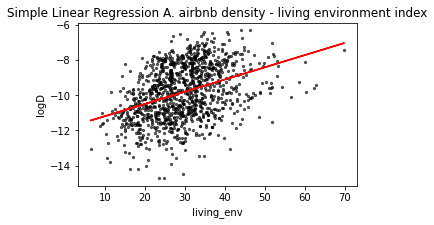

In [9]:
# import packages
from statsmodels.formula.api import ols 
import statsmodels.formula.api as smf

# calculate parameter
lm = ols('logD ~ living_env', data=cluster01).fit()
A_reg = smf.ols(formula='logD ~ living_env',data=cluster01).fit()
beta_A1, beta_A2 = A_reg.params
rsq_A    = A_reg.rsquared
pval_A1, pval_A2 = A_reg.pvalues
print("Simple linear regression A. airbnb density - living environment index")
print("y =", round(beta_A2,3), "x +", round(beta_A1,3))
print("R^2 = ", rsq_A)
print("p-value of living_env = ", round(pval_A2,5))
print("p-value of intercept = ", round(pval_A1,5))

# plot scatter and regression line
fig, ax = plt.subplots()
cluster01.plot(kind='scatter', x='living_env', y='logD', figsize=(5, 3), ax = ax,s=5, alpha = 0.6, color = 'k')
plt.title(label = "Simple Linear Regression A. airbnb density - living environment index")
X = cluster01.living_env
b = plt.plot(X, X*beta_A2 + beta_A1, 'r') # 回归线

## B. airbnb density - hous_serv

Simple linear regression B. Airbnb Density - Housing Index
y = -0.065 x + -7.34
R^2 =  0.11327163246817817
p-value of hous_serv =  0.0
p-value of intercept =  0.0


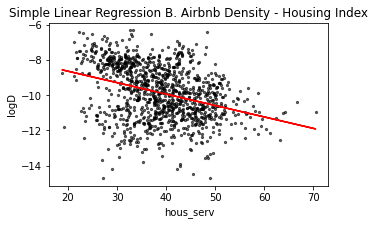

In [10]:
# calculate parameter
lm = ols('logD ~ hous_serv', data=cluster01).fit()
B_reg = smf.ols(formula='logD ~ hous_serv',data=cluster01).fit()
beta_B1, beta_B2 = B_reg.params
rsq_B    = B_reg.rsquared
pval_B1, pval_B2 = B_reg.pvalues
print("Simple linear regression B. Airbnb Density - Housing Index")
print("y =", round(beta_B2,3), "x +", round(beta_B1,3))
print("R^2 = ", rsq_B)
print("p-value of hous_serv = ", round(pval_B2,5))
print("p-value of intercept = ", round(pval_B1,5))

# plot scatter and regression line
fig, ax = plt.subplots()
cluster01.plot(kind='scatter', x='hous_serv', y='logD', figsize=(5, 3), ax = ax,s=5, alpha = 0.6, color = 'k')
plt.title(label = "Simple Linear Regression B. Airbnb Density - Housing Index")
X = cluster01.hous_serv
b = plt.plot(X, X*beta_B2 + beta_B1, 'r') # 回归线

## C. airbnb density - edu_ski_tra

Simple linear regression C. Airbnb Density - Education Index
y = -0.083 x + -7.87
R^2 =  0.19608758596453768
p-value of edu_ski_tra =  0.0
p-value of intercept =  0.0


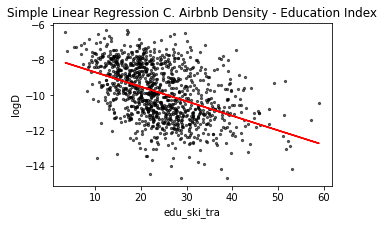

In [11]:
# calculate parameter
lm = ols('logD ~ edu_ski_tra', data=cluster01).fit()
C_reg = smf.ols(formula='logD ~ edu_ski_tra',data=cluster01).fit()
beta_C1, beta_C2 = C_reg.params
rsq_C    = C_reg.rsquared
pval_C1, pval_C2 = C_reg.pvalues
print("Simple linear regression C. Airbnb Density - Education Index")
print("y =", round(beta_C2,3), "x +", round(beta_C1,3))
print("R^2 = ", rsq_C)
print("p-value of edu_ski_tra = ", round(pval_C2,5))
print("p-value of intercept = ", round(pval_C1,5))

# plot scatter and regression line
fig, ax = plt.subplots()
cluster01.plot(kind='scatter', x='edu_ski_tra', y='logD', figsize=(5, 3), ax = ax,s=5, alpha = 0.6, color = 'k')
plt.title(label = "Simple Linear Regression C. Airbnb Density - Education Index")
X = cluster01.edu_ski_tra
b = plt.plot(X, X*beta_C2 + beta_C1, 'r') # 回归线

## D. airbnb density - health_depri

Simple linear regression D. Airbnb Density - Education Index
y = 1.374 x + -10.247
R^2 =  0.11325632590426848
p-value of health_deprivation =  0.0
p-value of intercept =  0.0


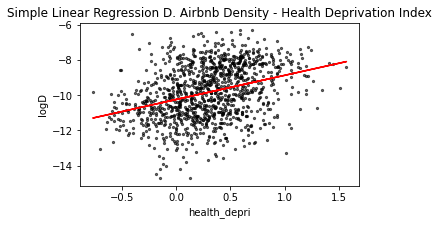

In [12]:
# calculate parameter
lm = ols('logD ~ health_depri', data=cluster01).fit()
C_reg = smf.ols(formula='logD ~ health_depri',data=cluster01).fit()
beta_C1, beta_C2 = C_reg.params
rsq_C    = C_reg.rsquared
pval_C1, pval_C2 = C_reg.pvalues
print("Simple linear regression D. Airbnb Density - Education Index")
print("y =", round(beta_C2,3), "x +", round(beta_C1,3))
print("R^2 = ", rsq_C)
print("p-value of health_deprivation = ", round(pval_C2,5))
print("p-value of intercept = ", round(pval_C1,5))

# plot scatter and regression line
fig, ax = plt.subplots()
cluster01.plot(kind='scatter', x='health_depri', y='logD', figsize=(5, 3), ax = ax,s=5, alpha = 0.6, color = 'k')
plt.title(label = "Simple Linear Regression D. Airbnb Density - Health Deprivation Index")
X = cluster01.health_depri
b = plt.plot(X, X*beta_C2 + beta_C1, 'r') # 回归线

summary:
    
    positive：
    living_env
    health depri
    
    高密度airbnb的社会负面影响被反映在这俩指标中。
    结合文献，环境相对恶劣，健康相对差？的地区，airbnb的密度较高，可能与airbnb带来的负面影响有关，建议政府关注此类区域，解决环境问题
    
    negative:
    edu_ski_tra
    hous_serv
    
    高密度airbnb更可能出现在这两指标较低的区域
    结合文献，教育程度高，房屋配套好的区域是airbnb发展的热门区域，建议政府提前为这些地区制定政策，控制airbnb密度
    

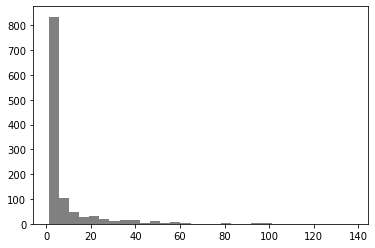

In [18]:
# hostlist histogram

HL = cluster01.m_hostlist
bins = 30
plt.hist(HL , bins, color = 'grey')
plt.show()

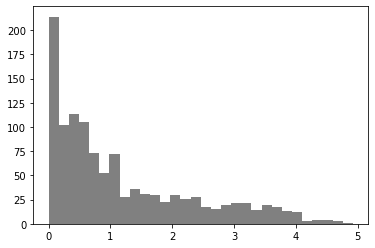

In [19]:
# log transformation
logHL = np.log(cluster01['m_hostlist'])
cluster01['logHL']=logHL
# log density histogram
logHL = cluster01.logHL
bins = 30
plt.hist(logHL , bins, color = 'grey')
plt.show()

## multiple regression - logD ~ living_env + health_depri

In [13]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(cluster01.loc[:,['living_env', 'edu_ski_tra', 'hous_serv','health_depri']], cluster01.density)

# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [ 5.78978916e-06 -6.57610777e-06 -8.48146594e-06  7.26342239e-05]


very low - reliable 

In [14]:
# logD ~ living_env + health_depri
import statsmodels.api as sm
test = sm.formula.ols(' logD ~ living_env + health_depri', cluster01).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logD   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     187.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.22e-71
Time:                        15:31:19   Log-Likelihood:                -1972.3
No. Observations:                1148   AIC:                             3951.
Df Residuals:                    1145   BIC:                             3966.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.1540      0.143    -84.972      0.000     -12.435     -11.873
living_env       0.0660      0.005     14.230      0.000       0.057       0.075
health_depri     1.2822      0.105     12.220      0.000       1.076       1.488
==============================================================================
Omnibus:                       12.838   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.482
Skew:                          -0.191   Prob(JB):                      0.00321
Kurtosis:                       2.693   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# logD ~  edu_ski_tra + hous_serv 
import statsmodels.api as sm
test = sm.formula.ols(' logD ~  edu_ski_tra + hous_serv ', cluster01).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logD   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.82e-89
Time:                        15:31:19   Log-Likelihood:                -1930.8
No. Observations:                1148   AIC:                             3868.
Df Residuals:                    1145   BIC:                             3883.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.5288      0.215    -25.686      0.000      -5.951      -5.106
edu_ski_tra    -0.0804      0.005    -17.416      0.000      -0.089      -0.071
hous_serv      -0.0620      0.005    -12.963      0.000      -0.071      -0.053
==============================================================================
Omnibus:                       32.377   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.437
Skew:                          -0.408   Prob(JB):                     3.33e-08
Kurtosis:                       3.234   Cond. No.                         259.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
test = sm.formula.ols(' logD ~ crime + income + employment', cluster01).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logD   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     41.74
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.35e-25
Time:                        15:31:19   Log-Likelihood:                -2075.1
No. Observations:                1148   AIC:                             4158.
Df Residuals:                    1144   BIC:                             4178.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1194      0.229    -52.974      0.000     -12.568     -11.671
crime          0.2845      0.094      3.016      0.003       0.099       0.470
income        14.3963      1.672      8.611      0.000      11.116      17.676
employment    -8.7082      2.281     -3.817      0.000     -13.184      -4.232
==============================================================================
Omnibus:                       14.405   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.906
Skew:                          -0.174   Prob(JB):                      0.00260
Kurtosis:                       2.643   Cond. No.                         76.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



2.3. Is Airbnb’s impact on society reflected in deprivation by areas with different social patterns? 

CATEGORY 2

## SUMMARY

七个imd指标中，
edu_ski_tra + hous_serv 的代表性更强，关注这俩都低的区域，探究airbnb 分布及其特征

living_env + health depri 也有参考意义，关注这俩都高的区域，探究是否为airbnb导致的

## 2.4. What kind of neighborhoods require improvements in Airbnb operation? 

A. 高密度airbnb 且 living_env + health depri 指数都高的区域

限制airbnb密度解决环境和健康问题

B. edu_ski_tra + hous_serv 指数都高但airbnb低的区域

制定预防政策，限制airbnb密度，以免带来负面影响